<a href="https://colab.research.google.com/github/PrasannaGiri17/AI/blob/main/2408641_PrasannaGiri_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

2408641
PrasannaGiri

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/enhanced_health_data.csv')

In [ ]:
df

,Name,Gender,Age,Systolic BP,Diastolic BP,Cholesterol,Height (cm),Weight (kg),BMI,Smoker,Diabetes,Health
0,Heidi Williamson,Male,35,129,83,188,169.072096,73.796178,25.816062,False,True,Fair
1,Eric Odom,Male,70,133,95,224,154.188610,70.671522,29.726232,False,False,Fair
2,Kelly Thomas,Male,79,149,88,179,197.514897,97.590268,25.015362,True,True,Bad
3,Ann Lara,Female,52,115,76,204,157.223771,82.202776,33.254473,False,False,Fair
4,Tammy Oliver,Male,51,135,82,201,177.370258,57.038726,18.130435,False,False,Fair
...,...,...,...,...,...,...,...,...,...,...,...,...
995,Mary Berger,Female,33,119,79,157,189.907684,55.199601,15.305618,False,False,Good
996,Grace Avila,Female,57,127,88,208,183.041461,52.775258,15.751844,False,False,Fair
997,Caitlyn Brown,Female,38,124,84,158,185.273872,65.673639,19.132104,False,True,Fair
998,Kristina Smith,Female,67,129,84,181,152.360401,83.614972,36.019679,False,True,Fair


In [ ]:
#display the first 10 rows.
df.head(10)



,Name,Gender,Age,Systolic BP,Diastolic BP,Cholesterol,Height (cm),Weight (kg),BMI,Smoker,Diabetes,Health
0,Heidi Williamson,Male,35,129,83,188,169.072096,73.796178,25.816062,False,True,Fair
1,Eric Odom,Male,70,133,95,224,154.188610,70.671522,29.726232,False,False,Fair
2,Kelly Thomas,Male,79,149,88,179,197.514897,97.590268,25.015362,True,True,Bad
3,Ann Lara,Female,52,115,76,204,157.223771,82.202776,33.254473,False,False,Fair
4,Tammy Oliver,Male,51,135,82,201,177.370258,57.038726,18.130435,False,False,Fair
5,Aaron Cox,Male,59,134,93,238,189.546695,98.647282,27.456975,True,False,Bad
6,Noah Mays,Male,54,125,89,173,183.331505,93.744224,27.891400,True,True,Bad
7,Stacey Dudley,Male,29,110,70,174,182.110011,90.691839,27.346426,True,True,Fair
8,Aaron Mills,Female,71,134,81,222,154.014354,93.389246,39.370821,True,True,Bad
9,Marcus Copeland,Female,35,131,84,206,179.051198,50.061216,15.615178,True,True,Bad


In [ ]:
#Identify the number of rows and columns in the dataset.
row=len(df.index)
print(f"no of row = {row}.")
columns=len(df.columns)
print(f"no of columns = {columns}.")


no of row = 1000.
no of columns = 12.


In [ ]:
#List all the columns and their data types.
print("All the columns and their data types :- ")
print(df.dtypes)

All the columns and their data types :- 
Name             object
Gender           object
Age               int64
Systolic BP       int64
Diastolic BP      int64
Cholesterol       int64
Height (cm)     float64
Weight (kg)     float64
BMI             float64
Smoker             bool
Diabetes           bool
Health           object
dtype: object


In [ ]:
 df.describe()

,Age,Systolic BP,Diastolic BP,Cholesterol,Height (cm),Weight (kg),BMI
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,48.834000,129.526000,82.879000,187.715000,175.038446,74.941397,24.919168
std,17.980816,9.532061,6.064911,21.091387,14.395461,14.622998,6.290984
min,18.000000,105.000000,65.000000,140.000000,150.087644,50.011915,13.094723
25%,33.000000,123.000000,80.000000,172.000000,162.805812,62.264152,20.162104
50%,49.000000,130.000000,83.000000,187.000000,175.426060,74.808034,24.164326
75%,64.000000,136.000000,87.000000,203.000000,187.827352,87.518363,28.671465
max,80.000000,150.000000,95.000000,239.000000,199.966307,99.954932,43.806649


In [ ]:
#checking missing file
missing_values = df.isnull().sum()
print(missing_values)

Name            0
Gender          0
Age             0
Systolic BP     0
Diastolic BP    0
Cholesterol     0
Height (cm)     0
Weight (kg)     0
BMI             0
Smoker          0
Diabetes        0
Health          0
dtype: int64


In [ ]:
#check duplicate data
df.duplicated().sum()


0

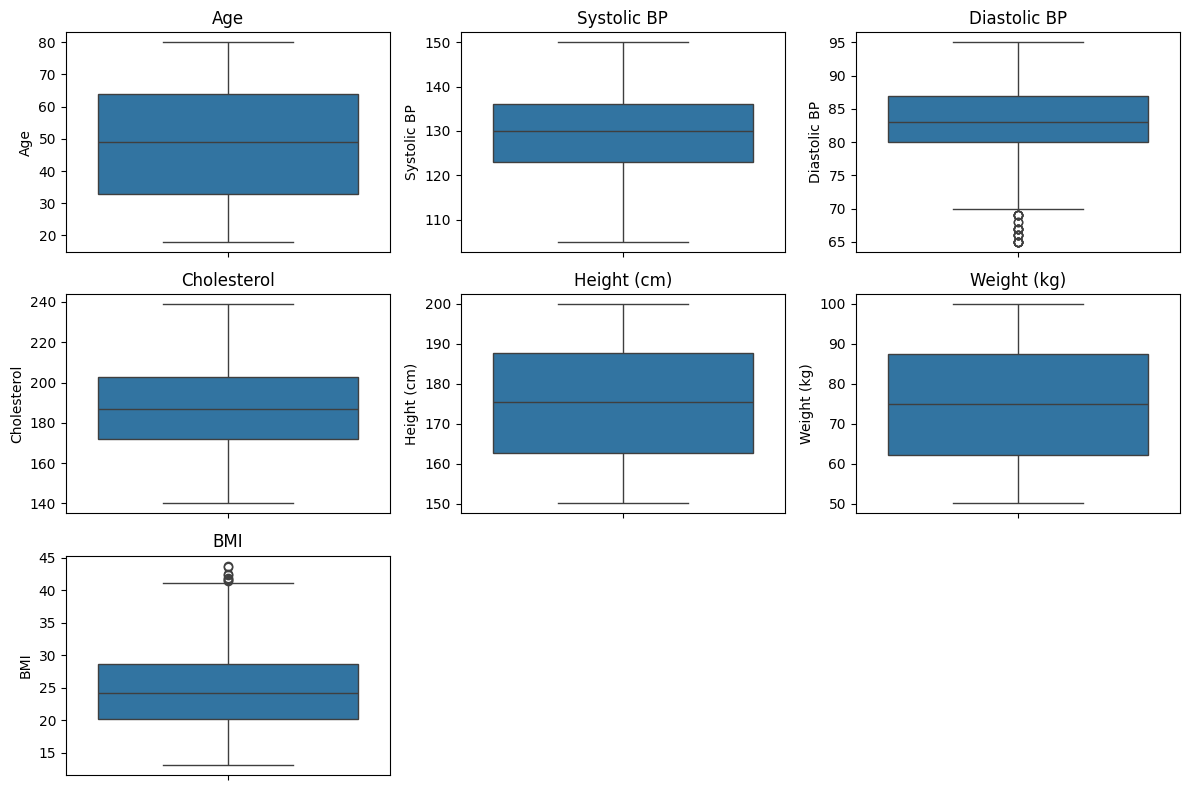

In [ ]:
#box plot
num_features =  df[['Age', 'Systolic BP', 'Diastolic BP', 'Cholesterol', 'Height (cm)',
        'Weight (kg)', 'BMI']]

# Creating boxplots for each numerical feature
plt.figure(figsize=(12, 8))
for i, col in enumerate(num_features.columns, 1):  # Use num_features.columns
    plt.subplot(3, 3, i)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

In [ ]:
#since there are outlier in the Diastolic BP and BMI
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Apply to Diastolic BP and BMI
df = remove_outliers_iqr(df, "Diastolic BP")
df = remove_outliers_iqr(df, "BMI")

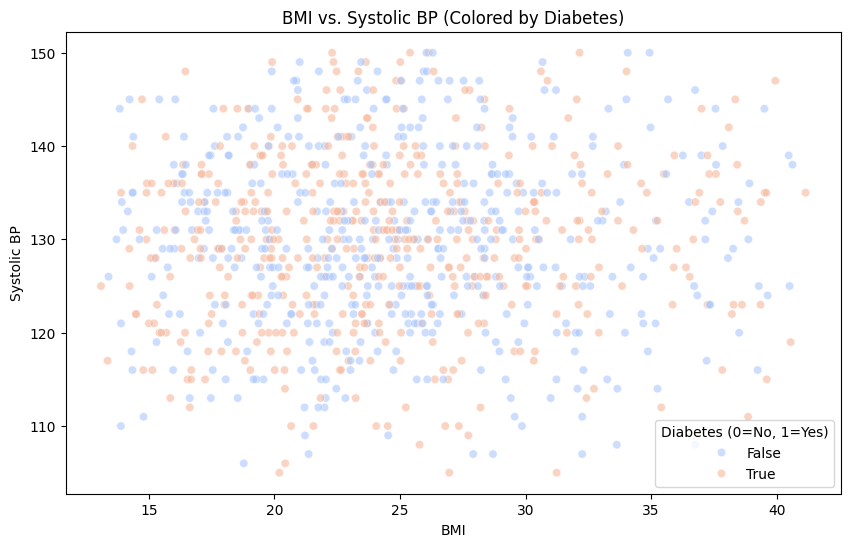

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x=df["BMI"], y=df["Systolic BP"], hue=df["Diabetes"], palette="coolwarm", alpha=0.6)
plt.xlabel("BMI")
plt.ylabel("Systolic BP")
plt.title("BMI vs. Systolic BP (Colored by Diabetes)")
plt.legend(title="Diabetes (0=No, 1=Yes)")
plt.show()


In [ ]:
c = df.select_dtypes(include=["number"]).corr()
c

,Age,Systolic BP,Diastolic BP,Cholesterol,Height (cm),Weight (kg),BMI
Age,1.000000,0.645534,0.617192,0.402910,-0.045259,0.024935,0.048651
Systolic BP,0.645534,1.000000,0.589070,0.360384,-0.039966,0.001428,0.029156
Diastolic BP,0.617192,0.589070,1.000000,0.399201,-0.040185,0.007737,0.028848
Cholesterol,0.402910,0.360384,0.399201,1.000000,-0.011924,0.020307,0.019887
Height (cm),-0.045259,-0.039966,-0.040185,-0.011924,1.000000,0.089686,-0.599415
Weight (kg),0.024935,0.001428,0.007737,0.020307,0.089686,1.000000,0.730761
BMI,0.048651,0.029156,0.028848,0.019887,-0.599415,0.730761,1.000000


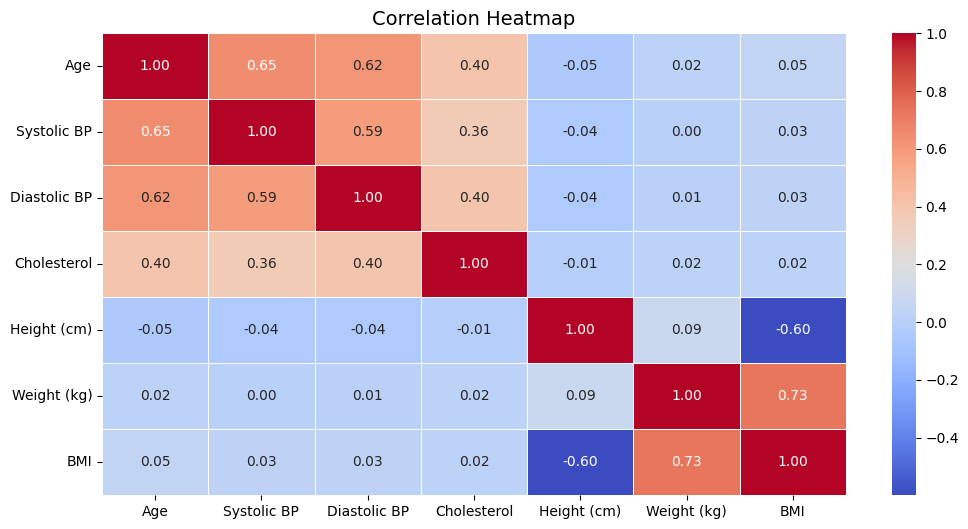

In [ ]:
plt.figure(figsize=(12,6))
sns.heatmap(c, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)  # Fix colormap
plt.title("Correlation Heatmap", fontsize=14)
plt.show()

In [ ]:
#saving clean dataset in drive
df.to_csv("/content/drive/MyDrive/enhanced_health_data_cleaned_data.csv", index=False)


In [ ]:
#opening the clean data set
df = pd.read_csv("/content/drive/MyDrive/enhanced_health_data_cleaned_data.csv")

In [ ]:
health_categories = [['Good', 'Fair', 'Bad']]
df['Health'] = df['Health'].astype(str)
encoder = OrdinalEncoder(categories=health_categories)
df[['Health']] = encoder.fit_transform(df[['Health']])
e = LabelEncoder()
df['Smoker'] = e.fit_transform(df['Smoker'])
df['Diabetes']=e.fit_transform(df['Diabetes'])
X = df[['Age', 'Systolic BP', 'Diastolic BP', 'Cholesterol', 'Height (cm)',
        'Weight (kg)', 'BMI', 'Smoker',"Health"]]
y=df['Diabetes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

2. Build a Model from Scratch

In [ ]:
#scratch
def sigmoid(z):
    return 1 / (1 + np.exp(-z))
# Initialize weights and bias
weights = np.zeros(X_train_scaled.shape[1])
bias = 0

# Cost function and gradient computation
def compute_cost_and_gradient(X, y, weights, bias):
    m = X.shape[0]
    z = np.dot(X, weights) + bias
    predictions = sigmoid(z)

    # Cost: Binary cross-entropy
    cost = -np.mean(y * np.log(predictions) + (1 - y) * np.log(1 - predictions))

    # Gradients
    dw = np.dot(X.T, (predictions - y)) / m
    db = np.mean(predictions - y)

    return cost, dw, db

# Gradient descent optimization
def gradient_descent(X, y, weights, bias, learning_rate, num_iterations):
    for i in range(num_iterations):
        cost, dw, db = compute_cost_and_gradient(X, y, weights, bias)

        # Update weights and bias
        weights -= learning_rate * dw
        bias -= learning_rate * db

        # Print cost every 100 iterations for debugging
        if i % 100 == 0:
            print(f"Iteration {i}: Cost {cost}")

    return weights, bias

# Training the model
learning_rate = 0.01
num_iterations = 1000
weights, bias = gradient_descent(X_train_scaled, y_train, weights, bias, learning_rate, num_iterations)

Iteration 0: Cost 0.6931471805599453
Iteration 100: Cost 0.6560879606152306
Iteration 200: Cost 0.6320925101952215
Iteration 300: Cost 0.6152586103612316
Iteration 400: Cost 0.6027170004862441
Iteration 500: Cost 0.5929677530436394
Iteration 600: Cost 0.5851623827367085
Iteration 700: Cost 0.5787832161894203
Iteration 800: Cost 0.5734922716058589
Iteration 900: Cost 0.5690558517032024


In [ ]:
# Predict labels using the trained model
def predict(X, weights, bias):
    z = np.dot(X, weights) + bias
    probabilities = sigmoid(z)
    return (probabilities >= 0.5).astype(int)  # Threshold at 0.5

# Predict on training and test sets
y_train_pred = predict(X_train_scaled, weights, bias)
y_test_pred = predict(X_test_scaled, weights, bias)

# Evaluate the model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluate_model(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    print(f"\n{model_name} Evaluation:")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}\n")

# Evaluate the scratch Logistic Regression model
print("Logistic Regression from Scratch:")
evaluate_model(y_train, y_train_pred, "Train Set")
evaluate_model(y_test, y_test_pred, "Test Set")

Logistic Regression from Scratch:

Train Set Evaluation:
Accuracy: 0.70
Precision: 0.72
Recall: 0.60
F1 Score: 0.66


Test Set Evaluation:
Accuracy: 0.69
Precision: 0.69
Recall: 0.62
F1 Score: 0.65



3.Build a Primary Model

In [ ]:
# Model 1 LogisticRegression
log_reg_sklearn = LogisticRegression()
log_reg_sklearn.fit(X_train_scaled, y_train)

y_pred_sklearn = log_reg_sklearn.predict(X_test_scaled)

accuracy_log = accuracy_score(y_test, y_pred_sklearn)
print(f"Scikit-Learn Logistic Regression Accuracy: {accuracy_log:.4f}")
print(classification_report(y_test, y_pred_sklearn))



Scikit-Learn Logistic Regression Accuracy: 0.7423
              precision    recall  f1-score   support

           0       0.77      0.74      0.75       102
           1       0.72      0.75      0.73        92

    accuracy                           0.74       194
   macro avg       0.74      0.74      0.74       194
weighted avg       0.74      0.74      0.74       194



In [ ]:
#model 2 RandomForestClassifier

# Train Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=50, max_depth=5, min_samples_split=10, min_samples_leaf=10, max_features='sqrt')

# Train the model
rf_model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_rf = rf_model.predict(X_test_scaled)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Classifier Accuracy: {accuracy_rf:.4f}")
print(classification_report(y_test, y_pred_rf))


Random Forest Classifier Accuracy: 0.6907
              precision    recall  f1-score   support

           0       0.66      0.84      0.74       102
           1       0.75      0.52      0.62        92

    accuracy                           0.69       194
   macro avg       0.71      0.68      0.68       194
weighted avg       0.70      0.69      0.68       194



In [ ]:
#checking which model is better by comparing accuracy of Logistic Regression and Random Forest Classifier
if accuracy_log > accuracy_rf:
    print("Logistic Regression performed better based on accuracy.")
else:
    print("Random Forest performed better based on accuracy.")

Logistic Regression performed better based on accuracy.


Hyper-parameter Optimization with Cross-Validation

In [ ]:
# Define the model
log_reg = LogisticRegression()

# Define the hyperparameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'solver': ['liblinear', 'lbfgs'],  # Solver methods
    'max_iter': [100, 200, 500]  # Number of iterations
}

# Perform Grid Search
grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# Best parameters
print("Best hyperparameters Parameters Logistic Regression:", grid_search.best_params_)


Best hyperparameters Parameters: {'C': 1, 'max_iter': 100, 'solver': 'liblinear'}


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
rf_param_grid = {
    'n_estimators': [100, 200, 500, 1000],  # Number of trees in the forest
    'max_depth': [None, 10, 20],  # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4]  # Minimum samples required to be at a leaf node
}
rf_random = RandomizedSearchCV(RandomForestClassifier(random_state=42), rf_param_grid, n_iter=5, cv=3, scoring='accuracy', random_state=42)  # Reduced iterations and folds
rf_random.fit(X_train_scaled, y_train)
print("Best hyperparameters for Random Forest:", rf_random.best_params_)

Best hyperparameters for Random Forest: {'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_depth': 10}


5. Feature Selection

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif
k = 5
selector = SelectKBest(score_func=f_classif, k=k)
X_train_selected = selector.fit_transform(X_train_scaled, y_train)
X_test_selected = selector.transform(X_test_scaled)

# Get selected feature names
selected_features = X.columns[selector.get_support()]
print("Selected Features:", selected_features)

Selected Features: Index(['Age', 'Cholesterol', 'Weight (kg)', 'Smoker', 'Health'], dtype='object')


6. Final Model

In [ ]:

#Logistic Regression final model
selected_features = ['Age', 'Cholesterol', 'Weight (kg)', 'Smoker', 'Health']
X = df[selected_features]
y = df['Diabetes']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Logistic Regression Model with Best Parameters
log_reg = LogisticRegression(C=1, max_iter=100, solver='liblinear')
log_reg.fit(X_train_scaled, y_train)

# Predictions
y_pred = log_reg.predict(X_test_scaled)


# Evaluate Model
accuracy_final_log = accuracy_score(y_test, y_pred)


print(f"Accuracy: {accuracy_final_log:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.7165

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.72      0.73       102
           1       0.69      0.72      0.71        92

    accuracy                           0.72       194
   macro avg       0.72      0.72      0.72       194
weighted avg       0.72      0.72      0.72       194



In [ ]:

# Define selected features
selected_features = ['Age', 'Cholesterol', 'Weight (kg)', 'Smoker', 'Health']



# Define X (features) and y (target)
X = df[selected_features]
y = df['Diabetes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Random Forest Model with Best Hyperparameters
rf = RandomForestClassifier(
    n_estimators=500,
    min_samples_split=2,
    min_samples_leaf=4,
    max_depth=10,
    random_state=42
)
rf.fit(X_train_scaled, y_train)

# Predictions
y_pred = rf.predict(X_test_scaled)


# Evaluate Model
accuracy_final_ran = accuracy_score(y_test, y_pred)


print(f"Accuracy: {accuracy_final_ran:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.7320

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.75      0.75       102
           1       0.72      0.71      0.71        92

    accuracy                           0.73       194
   macro avg       0.73      0.73      0.73       194
weighted avg       0.73      0.73      0.73       194



In [ ]:
#Comparing accuracy of the final model of Random Forest Classifier with the inital one.
if accuracy_final_ran > accuracy_rf:
    print(f"Final Random Forest model is better\n"
          f"Initial Accuracy: {accuracy_rf:.4f}\n"
          f"Final Accuracy: {accuracy_final_ran:.4f}\n"
          f"Improvement: {accuracy_final_ran - accuracy_rf:.4f}")
elif accuracy_final_ran < accuracy_rf:
    print(f"Initial Random Forest model performed better."
          f"Initial Accuracy: {accuracy_rf:.4f}\n"
          f"Final Accuracy: {accuracy_final_ran:.4f}\n"
          f"Drop in Performance: {accuracy_rf - accuracy_final_ran:.4f}")
else:
    print(f"Both models performed the same!\n"
          f"Accuracy: {accuracy_rf:.4f}")


Final Random Forest model is better
Initial Accuracy: 0.6856
Final Accuracy: 0.7320
Improvement: 0.0464


In [ ]:
#Comparing accuracy of the final model of Logistic Regression with the inital one.
if accuracy_final_log > accuracy_log:
    print(f"Final Logistic Regression model is better\n"
          f"Initial Accuracy: {accuracy_log:.4f}\n"
          f"Final Accuracy: {accuracy_final_log:.4f}\n"
          f"Improvement: {accuracy_final_log - accuracy_log:.4f}")
elif accuracy_final_log < accuracy_log:
    print(f"Initial Logistic Regression model performed better.\n"
          f"Initial Accuracy: {accuracy_log:.4f}\n"
          f"Final Accuracy: {accuracy_final_log:.4f}\n"
          f"Drop in Performance: {accuracy_log - accuracy_final_log:.4f}")
else:
    print(f"Both models performed same\n"
          f"Accuracy: {accuracy_log:.4f}")


Initial Logistic Regression model performed better.
Initial Accuracy: 0.7423
Final Accuracy: 0.7165
Drop in Performance: 0.0258


7. Conclusion:

1. Model Performance: How did your models perform in? Discuss the key results and metrics.
->The logistic regression model achieved an accuracy of 74.23%. For class 0, precision was 0.77, recall 0.74, and F1-score 0.75. For class 1, precision was 0.72, recall 0.75, and F1-score 0.73. The macro and weighted averages for precision, recall, and F1-score were all around 0.74, indicating a balanced performance across both classes.The model performs slightly better at predicting class 0.


-> The Random Forest model achieved an accuracy of 69.07%. For class 0, precision was 0.66, recall 0.84, and F1-score 0.74. For class 1, precision was 0.75, recall 0.52, and F1-score 0.62. The macro average shows precision of 0.71, recall of 0.68, and F1-score of 0.68, while the weighted averages are precision 0.70, recall 0.69, and F1-score 0.68. The model performs well at identifying class 0 but struggles more with class 1, particularly in recall, indicating a bias toward class 0.

2. Impact of Methods: Analyze the effect of the techniques you applied, such as Cross-Validation
and Feature Selection. Did these methods improve or reduce model performance? Provide a brief
explanation.
->In the case of Logistic Regression, applying techniques like Cross-Validation and Feature Selection led to a slight drop in performance. The initial accuracy was 74.23%, but after these methods were applied, the accuracy decreased to 71.65%, showing a drop of 0.0258 (approximately 2.58%).

-> For the Random Forest model, applying techniques like Cross-Validation and Feature Selection resulted in an improvement. The initial accuracy was 68.56%, and after applying these methods, the accuracy increased to 73.20%, showing an improvement of 0.0464 (approximately 4.64%)

3.Insights and Future Directions: Reflect on what you learned from the experiment. What insights
can be drawn from your analysis, and what potential improvements or extensions could be explored in
future work?
->The experiment highlighted that feature selection and cross-validation had varying impacts on model performance. While Logistic Regression showed a slight drop in accuracy after applying these methods, Random Forest benefited, improving its performance. Future improvements could include advanced feature engineering, exploring other models (like SVM or Gradient Boosting), and handling class imbalance. Additionally, enhancing model interpretability through methods like SHAP or LIME could provide deeper insights into feature importance. These approaches can help further refine model accuracy and generalization in future work.